<a href="https://colab.research.google.com/github/Angelina1225/DV-LAB/blob/master/LAB_2_DV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *

In [ ]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

In [ ]:
# Apply the default theme
sns.set_theme()

# ONE NUMERIC VARIABLE


In [ ]:
df = pd.read_csv("1_OneNum.csv")

In [ ]:
df1 = df[df['price'] < 300]

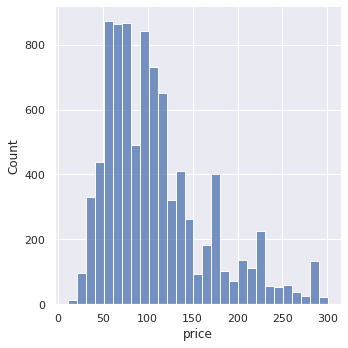

In [ ]:
sns.displot(data=df1, x="price", binwidth=10)

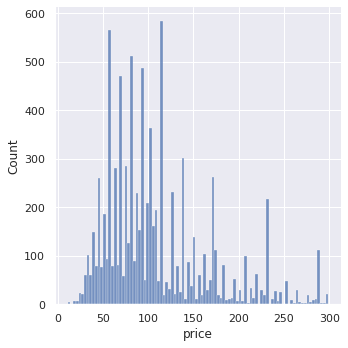

In [ ]:
sns.displot(data=df1, x="price", binwidth=3)

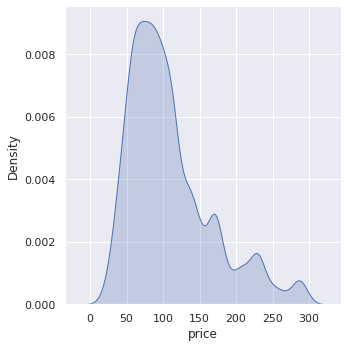

In [ ]:
sns.displot(data=df1, x="price", kind = 'kde',fill=True)

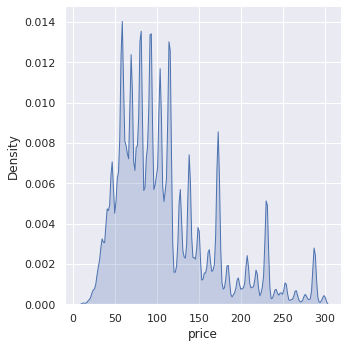

In [ ]:
sns.displot(data=df1, x="price", kind = 'kde', bw_adjust=.20, fill=True)

# TWO NUMERIC VARIABLES - NOT ORDERED

In [ ]:
df2 = pd.read_csv("2_TwoNum.csv")

In [ ]:
df2['SalePrice'] = df2.apply(lambda row: row.SalePrice/1000, axis = 1)
df2.head()

,GrLivArea,SalePrice
0,1710,208.5
1,1262,181.5
2,1786,223.5
3,1717,140.0
4,2198,250.0


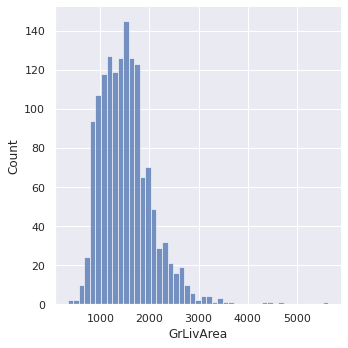

In [ ]:
sns.displot(data=df2, x="GrLivArea")

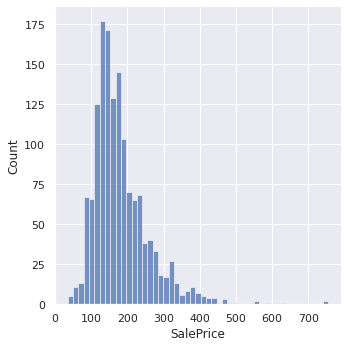

In [ ]:
sns.displot(data=df2, x="SalePrice")

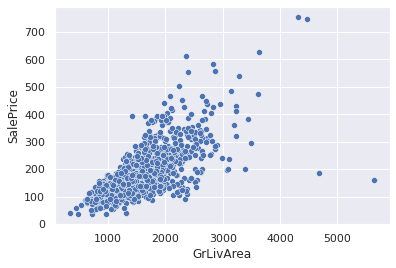

In [ ]:
sns.scatterplot(data=df2, x="GrLivArea", y="SalePrice")

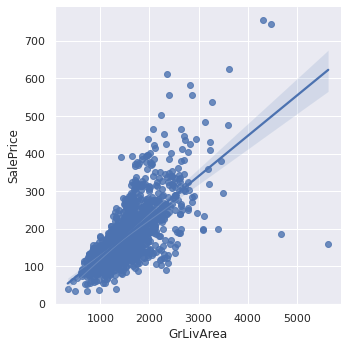

In [ ]:
sns.lmplot(data=df2, x="GrLivArea", y="SalePrice")

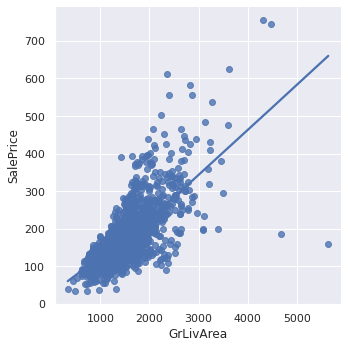

In [ ]:
sns.lmplot(data=df2, x="GrLivArea", y="SalePrice", lowess = True)

In [ ]:
pt = px.scatter(df2, x="GrLivArea", y="SalePrice")

# Create a Figure and plot it
fig = go.Figure(pt)
iplot(fig, show_link=False)

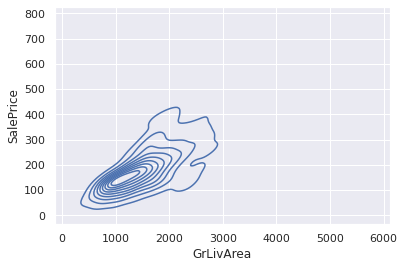

In [ ]:
sns.kdeplot(data=df2, x="GrLivArea", y="SalePrice")

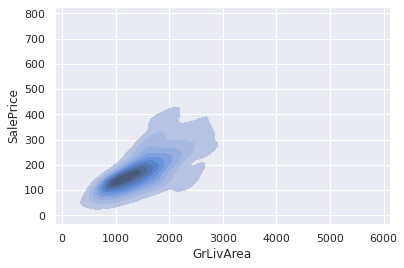

In [ ]:
sns.kdeplot(data=df2, x="GrLivArea", y="SalePrice", fill='..level..')

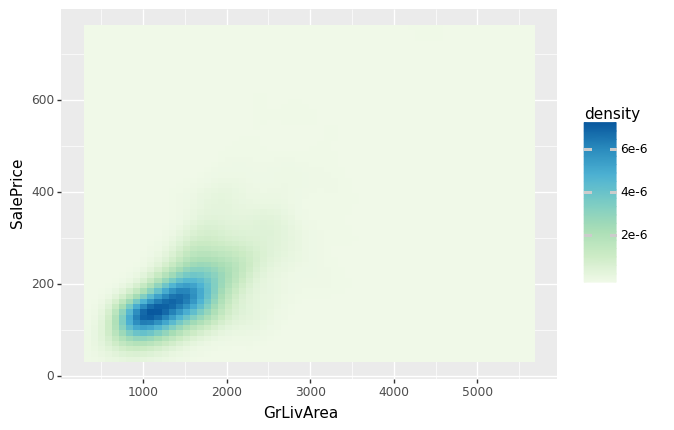

<ggplot: (8773853964243)>

In [ ]:
p = (ggplot(df2, aes(x="GrLivArea", y="SalePrice")) +
  stat_density_2d(aes(fill = '..density..'), geom = "raster", contour = False) +
  scale_fill_distiller(palette=4, direction=1) 
)
p

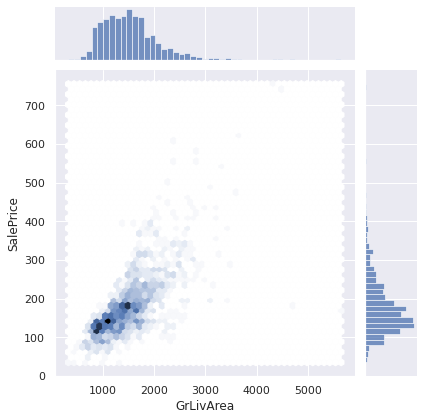

In [ ]:
sns.jointplot(data=df2, x="GrLivArea", y="SalePrice", kind="hex");


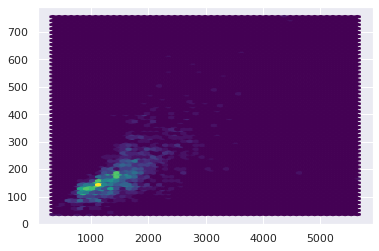

In [ ]:
plt.hexbin(data=df2, x="GrLivArea", y="SalePrice",cmap='viridis', gridsize=(50,50))

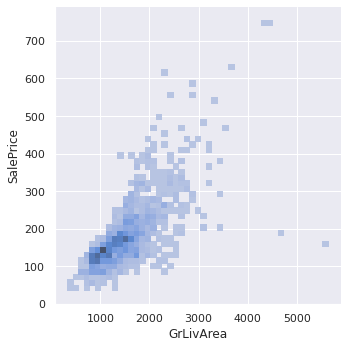

In [ ]:
sns.displot(data=df2, x="GrLivArea", y="SalePrice")

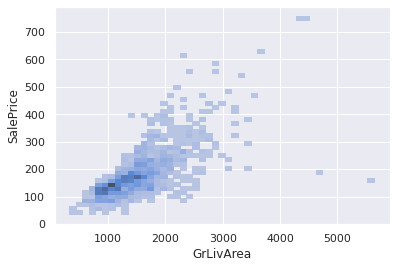

In [ ]:
sns.histplot(data=df2, x="GrLivArea", y="SalePrice")

# TWO NUMERIC VARIABLES - ORDERED

In [ ]:
df3 = pd.read_csv("3_TwoNumOrdered_comma.csv")
df3.shape

(1822, 2)

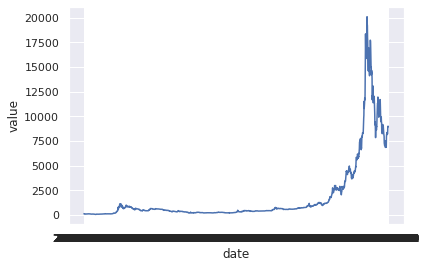

In [ ]:
sns.lineplot(data=df3, x = "date", y="value")

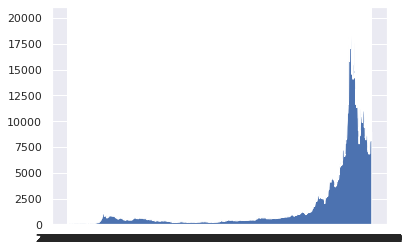

In [ ]:
plt.stackplot(df3.date, df3.value)

In [ ]:
pt1 = px.area(df3, x = "date", y="value")

# Create a Figure and plot it
fig = go.Figure(pt1)
iplot(fig, show_link=False)


(8000.0, 9050.0)

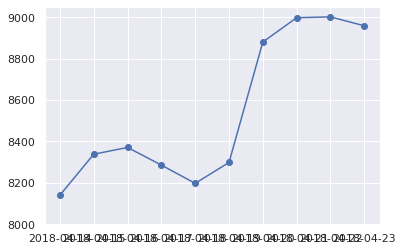

In [ ]:
plt.scatter("date", "value", data=df3.tail(10), zorder=1)
plt.plot("date", "value", data=df3.tail(10), zorder=2)
plt.ylim(8000,9050)

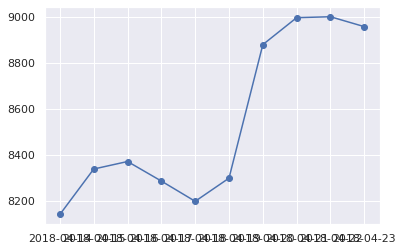

In [ ]:
plt.plot("date", "value", data=df3.tail(10), marker='o')

In [ ]:
# df3['mycolor'] = df3['value'].apply(lambda x: ifelse(x, df3.value, 'yes', 'no'))
df3['mycolor'] = df3['value'].apply(lambda x: 'yes' if x>7500 else 'no')
# df_3['mycolr'] = df3.apply(lambda _: '', axis=1)
# df_3 = df3.assign(mycolor = lambda x: ifelse(x.value>7500, "yes", "no"))
print(df3)

            date    value mycolor
0     2013-04-28   135.98      no
1     2013-04-29   147.49      no
2     2013-04-30   146.93      no
3     2013-05-01   139.89      no
4     2013-05-02   125.60      no
...          ...      ...     ...
1817  2018-04-19  8298.69     yes
1818  2018-04-20  8880.23     yes
1819  2018-04-21  8997.57     yes
1820  2018-04-22  9001.64     yes
1821  2018-04-23  8958.55     yes

[1822 rows x 3 columns]


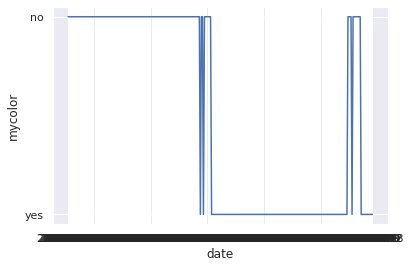

In [ ]:
sns.lineplot(data=df3.tail(300), x = "date", y="mycolor")

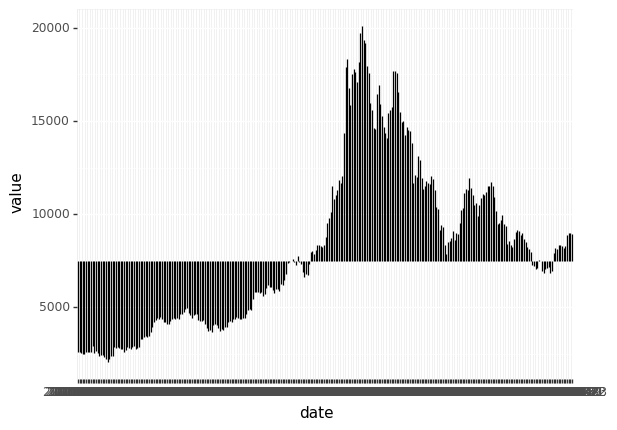

<ggplot: (8773851824086)>

In [ ]:
# palette = {c:'red' if c=='yes' else 'lightgrey' for c in df3.mycolor.unique()}
p = (ggplot(df3.tail(300), aes(x="date", y="value")) +
     geom_ribbon(aes(ymin=7500, ymax=df3.tail(300).value, fill=df3.tail(300).mycolor), color="black", show_legend=False) 
  # stat_density_2d(aes(fill = '..density..'), geom = "raster", contour = False) +
  # scale_fill_distiller(palette=4, direction=1) 
)
p
# geom_ribbon(mapping=None, data=None, stat='identity', position='identity',
#             na_rm=False, inherit_aes=True, show_legend=None, raster=False,
#             outline_type='both', **kwargs)
# geom_ribbon(aes(ymin=7500, ymax=value, fill=mycolor), color="black", alpha=0.5)

# THREE NUMERIC VARIABLES - NOT ORDERED

In [ ]:
df4 = pd.read_csv("4_ThreeNum.csv")
df4.head()

,country,continent,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,43.828,31889923,974.580338
1,Albania,Europe,76.423,3600523,5937.029526
2,Algeria,Africa,72.301,33333216,6223.367465
3,Angola,Africa,42.731,12420476,4797.231267
4,Argentina,Americas,75.320,40301927,12779.379640


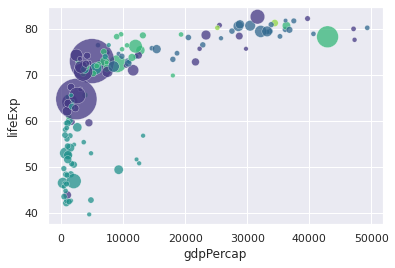

In [ ]:
sns.scatterplot(data=df4, x="gdpPercap", y="lifeExp", size = "pop", hue = "continent",  alpha=0.75, palette="viridis", edgecolors="black", legend=False, sizes=(20, 2000))

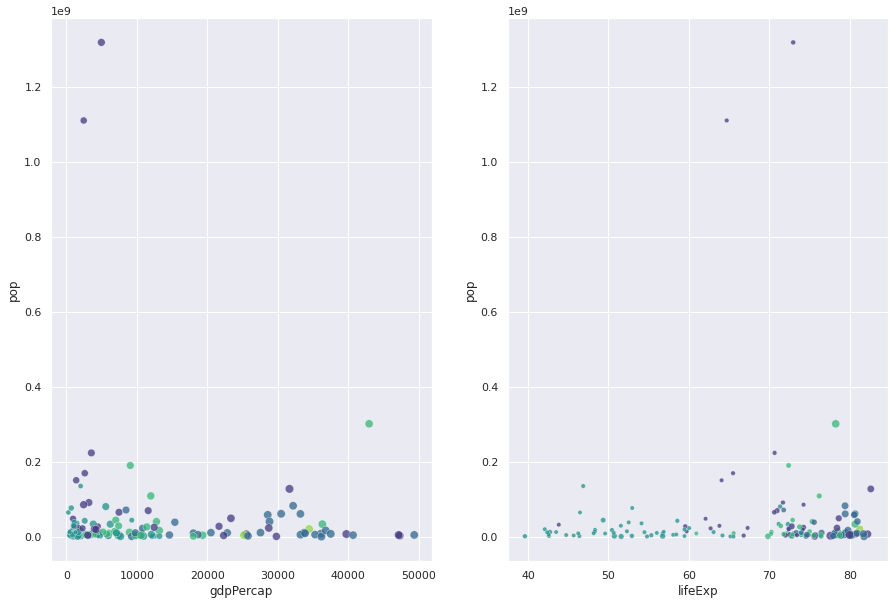

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
sns.scatterplot(ax=axes[0], data=df4, x="gdpPercap", y="pop", size = "lifeExp", hue = "continent", alpha=0.75, palette="viridis", edgecolors="black", legend=False)
sns.scatterplot(ax=axes[1], data=df4, x="lifeExp", y="pop", size = "gdpPercap", hue = "continent", alpha=0.75, palette="viridis", edgecolors="black", legend=False)

In [ ]:
pt = px.scatter(df4, x="gdpPercap", y="lifeExp", size="pop", color="continent", hover_name="country", size_max = 50)

# Create a Figure and plot it
fig = go.Figure(pt)
iplot(fig, show_link=False)

volcano -- do

# THREE NUMERIC VARIABLES - ORDERED

In [ ]:
df5 = pd.read_csv("5_OneCatSevNumOrdered.csv")
df5.head()

,year,sex,name,n,prop
0,1880,F,Helen,636,0.006516
1,1880,F,Amanda,241,0.002469
2,1880,F,Betty,117,0.001199
3,1880,F,Dorothy,112,0.001147
4,1880,F,Linda,27,0.000277


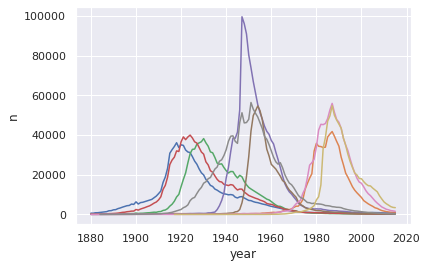

In [ ]:
sns.lineplot(data=df5, x="year", y="n", hue="name", legend = False)

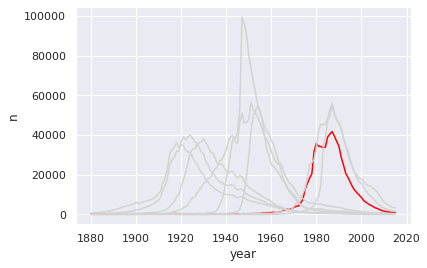

In [ ]:
palette = {c:'red' if c=='Amanda' else 'lightgrey' for c in df5.name.unique()}

sns.lineplot(data=df5, x="year", y="n", hue="name", legend = False, palette=palette)

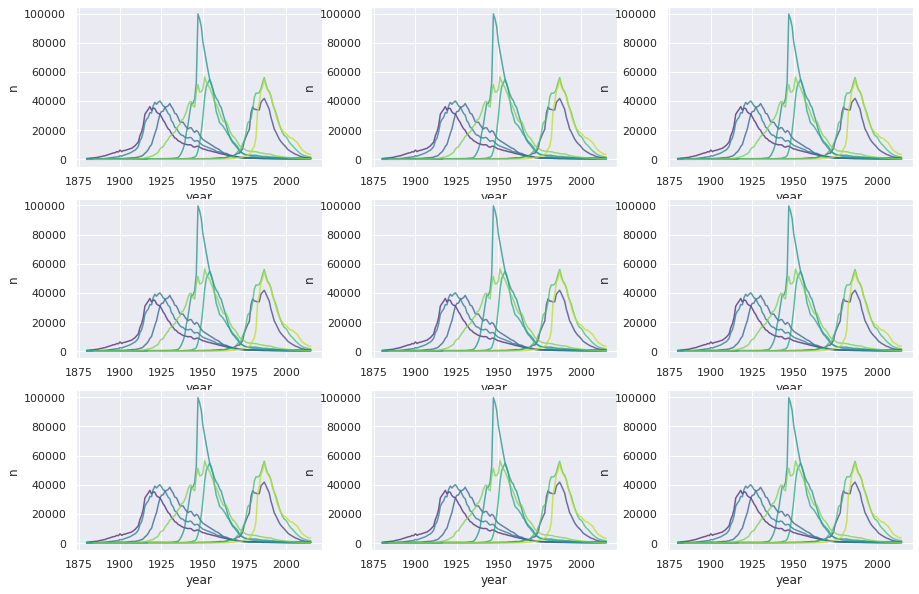

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
sns.lineplot(ax=axes[0, 0], data=df5, x="year", y="n", hue = "name", alpha=0.75, palette="viridis", legend=False)
sns.lineplot(ax=axes[0, 1], data=df5, x="year", y="n", hue = "name", alpha=0.75, palette="viridis", legend=False)
sns.lineplot(ax=axes[0, 2], data=df5, x="year", y="n", hue = "name", alpha=0.75, palette="viridis", legend=False)
sns.lineplot(ax=axes[1, 0], data=df5, x="year", y="n", hue = "name", alpha=0.75, palette="viridis", legend=False)
sns.lineplot(ax=axes[1, 1], data=df5, x="year", y="n", hue = "name", alpha=0.75, palette="viridis", legend=False)
sns.lineplot(ax=axes[1, 2], data=df5, x="year", y="n", hue = "name", alpha=0.75, palette="viridis", legend=False)
sns.lineplot(ax=axes[2, 0], data=df5, x="year", y="n", hue = "name", alpha=0.75, palette="viridis", legend=False)
sns.lineplot(ax=axes[2, 1], data=df5, x="year", y="n", hue = "name", alpha=0.75, palette="viridis", legend=False)
sns.lineplot(ax=axes[2, 2], data=df5, x="year", y="n", hue = "name", alpha=0.75, palette="viridis", legend=False)

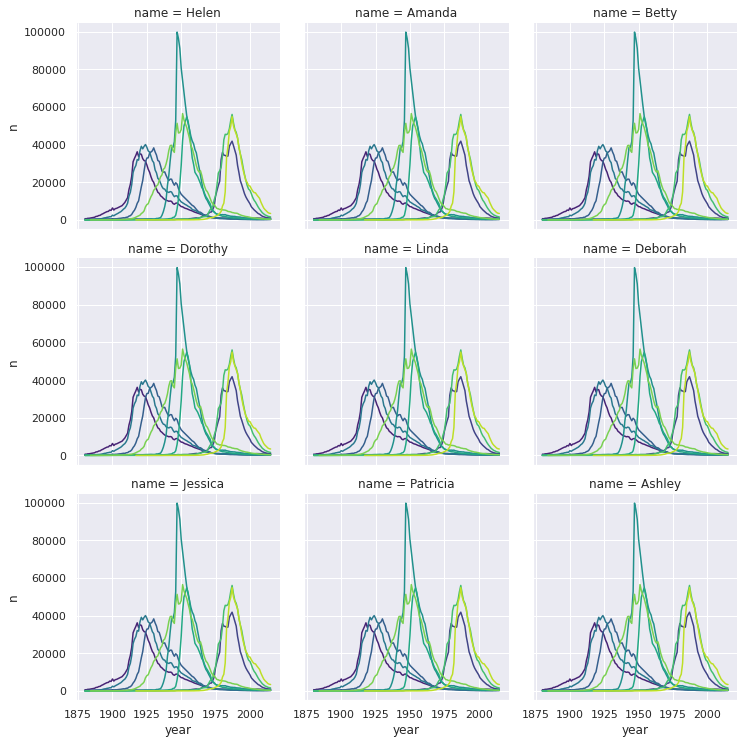

In [ ]:
g = sns.FacetGrid(df5, col="name", col_wrap=3, height=3.5, aspect=1)
g.map(sns.lineplot, data=df5, x="year", y="n", hue="name", palette="viridis")

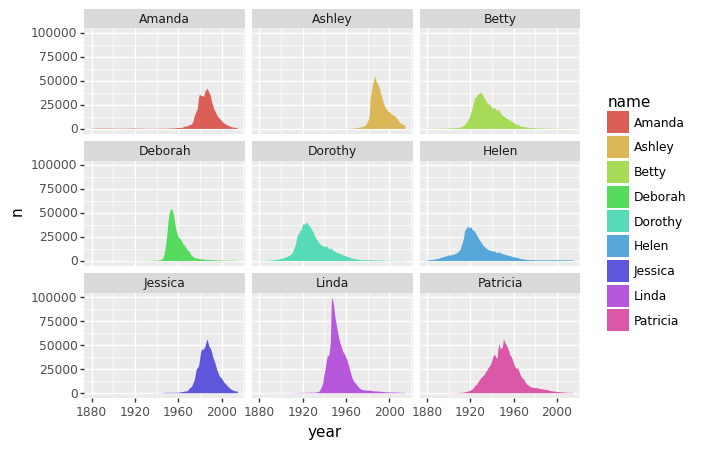

<ggplot: (8773849159753)>

In [ ]:
p = (ggplot(df5, aes(x="year", y="n")) +
     geom_area(aes(group="name", fill="name", ymax = "n", where='n > 0')) +
    #  scale_fill_viridis(discrete = TRUE) +
     facet_wrap("name")
)
p

In [ ]:
pt = px.area(df5, x="year", y="n", color="name", hover_name="name")

# Create a Figure and plot it
fig = go.Figure(pt)
iplot(fig, show_link=False)

In [ ]:
df_5 = df5.assign(freq = lambda x: x.n/sum(x.n))
print(df_5)

# df5['freq'] = df5.assign(new_col=lambda n: n/sum(n), axis = 1)
# df5.head()

      year sex      name    n      prop      freq
0     1880   F     Helen  636  0.006516  0.000067
1     1880   F    Amanda  241  0.002469  0.000025
2     1880   F     Betty  117  0.001199  0.000012
3     1880   F   Dorothy  112  0.001147  0.000012
4     1880   F     Linda   27  0.000277  0.000003
...    ...  ..       ...  ...       ...       ...
1156  2015   F     Linda  423  0.000219  0.000044
1157  2015   F   Dorothy  395  0.000204  0.000041
1158  2015   F   Deborah  346  0.000179  0.000036
1159  2015   F  Patricia  346  0.000179  0.000036
1160  2015   F     Betty  186  0.000096  0.000019

[1161 rows x 6 columns]


In [ ]:
pt = px.area(df_5, x="year", y="freq", color="name", hover_name="name", hover_data = {"name": False, "year": False, "freq": False})

# Create a Figure and plot it
fig = go.Figure(pt)
iplot(fig, show_link=False)

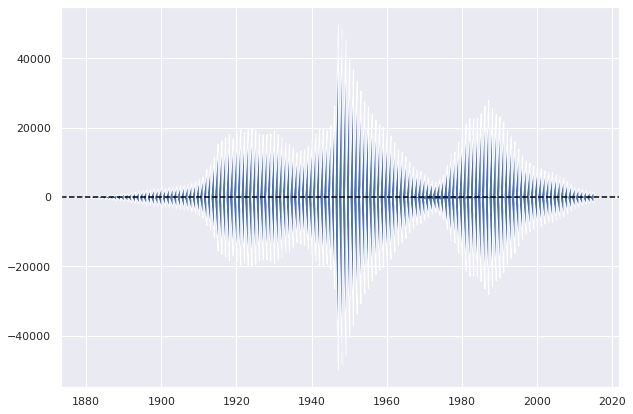

In [ ]:
x = df_5.year
y = df_5.n
fig, ax = plt.subplots(figsize=(10, 7))
ax.stackplot(x,y, baseline="wiggle");
ax.axhline(0, color="black", ls="--");

PCA -- do

# SEVERAL NUMERIC - NOT ORDERED



In [ ]:
df6 = pd.read_csv("6_SeveralNum.csv")
df6.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


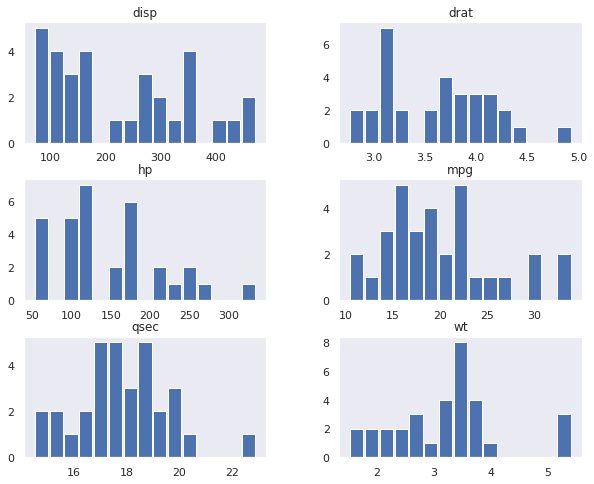

In [ ]:
df6[['disp', 'drat', 'hp', 'mpg', 'qsec', 'wt']].hist(
    bins=15,
    figsize=(10, 8),
    grid = False,
    rwidth = 0.9,
)
plt.show()

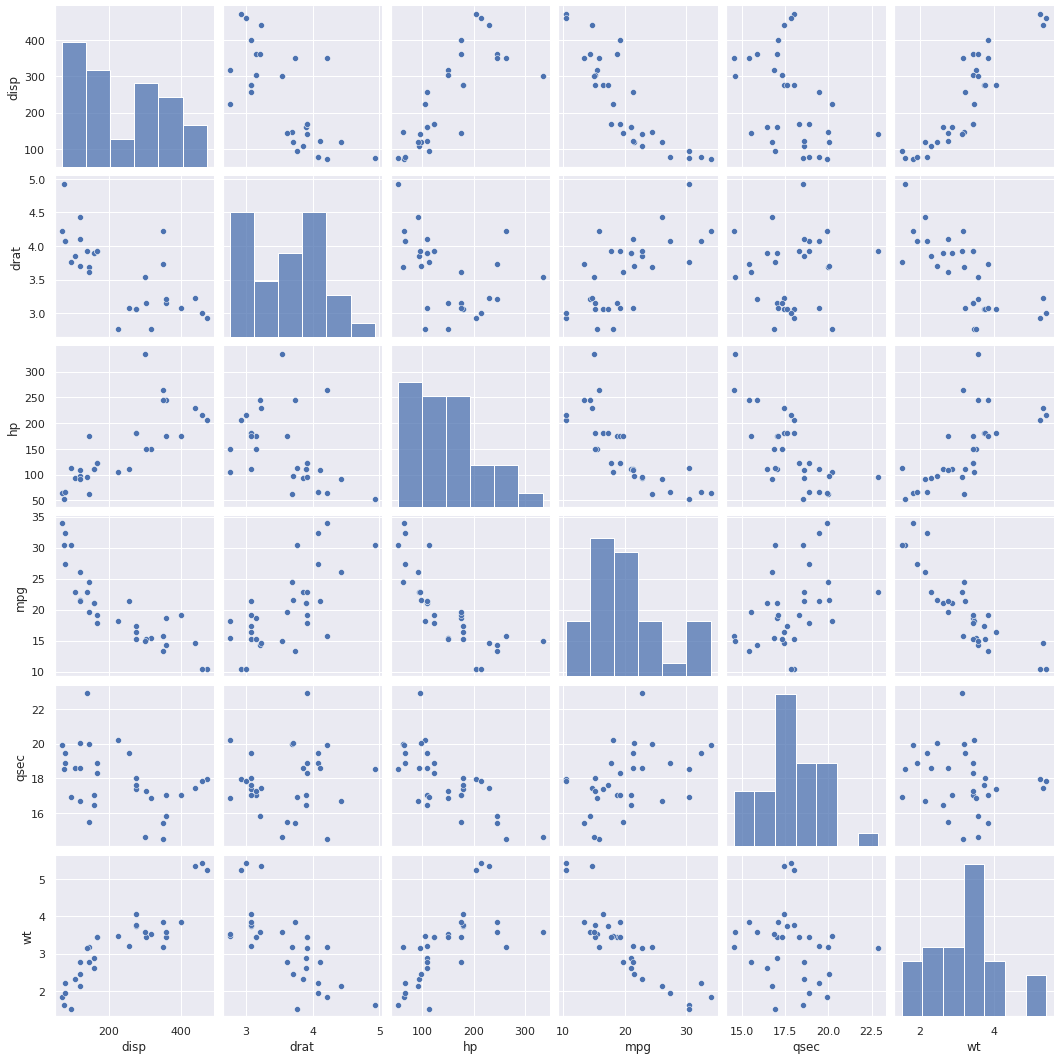

In [ ]:
sns.pairplot(df6[['disp', 'drat', 'hp', 'mpg', 'qsec', 'wt']], kind="scatter")
plt.show()

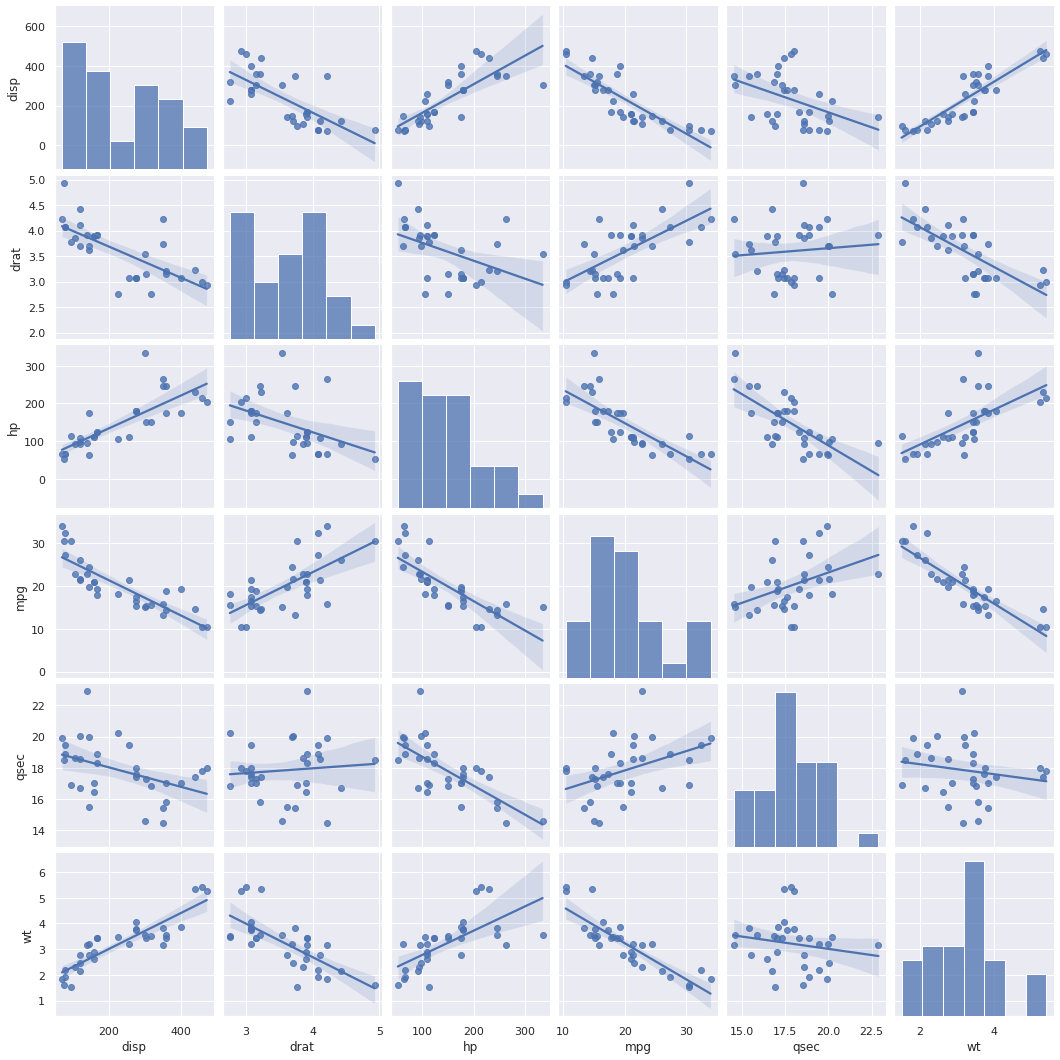

In [ ]:
sns.pairplot(df6[['disp', 'drat', 'hp', 'mpg', 'qsec', 'wt']], kind="reg")
plt.show()

In [ ]:
from sklearn.preprocessing import normalize
data = normalize(df6[['disp', 'drat', 'hp', 'mpg', 'qsec', 'wt']])
data = pd.DataFrame(data, columns=df6[['disp', 'drat', 'hp', 'mpg', 'qsec', 'wt']].columns)
data.head()

,disp,drat,hp,mpg,qsec,wt
0,0.816135,0.019893,0.561093,0.107118,0.083960,0.013364
1,0.815921,0.019888,0.560946,0.107090,0.086794,0.014661
2,0.741758,0.026442,0.638736,0.156593,0.127816,0.015934
3,0.914918,0.010922,0.390081,0.075889,0.068938,0.011401
4,0.897518,0.007853,0.436294,0.046621,0.042433,0.008576


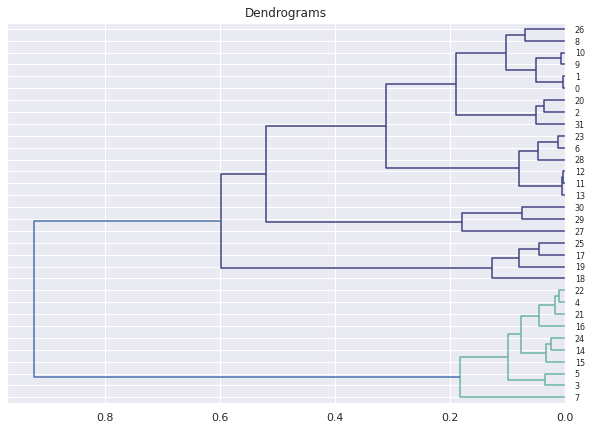

In [ ]:
import scipy.cluster.hierarchy as shc
shc.set_link_color_palette(["#69b3a2", "#404080", "orange"])
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward',metric='euclidean'), orientation="left", ax=None)

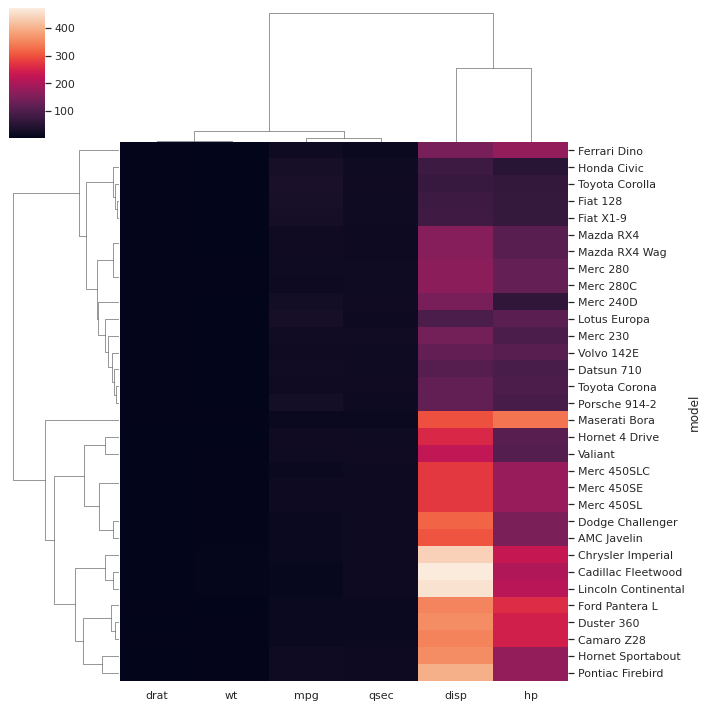

In [ ]:
url = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/mtcars.csv'
df = pd.read_csv(url)
df = df.set_index('model')

sns.clustermap(df[['disp', 'drat', 'hp', 'mpg', 'qsec', 'wt']])
plt.show()

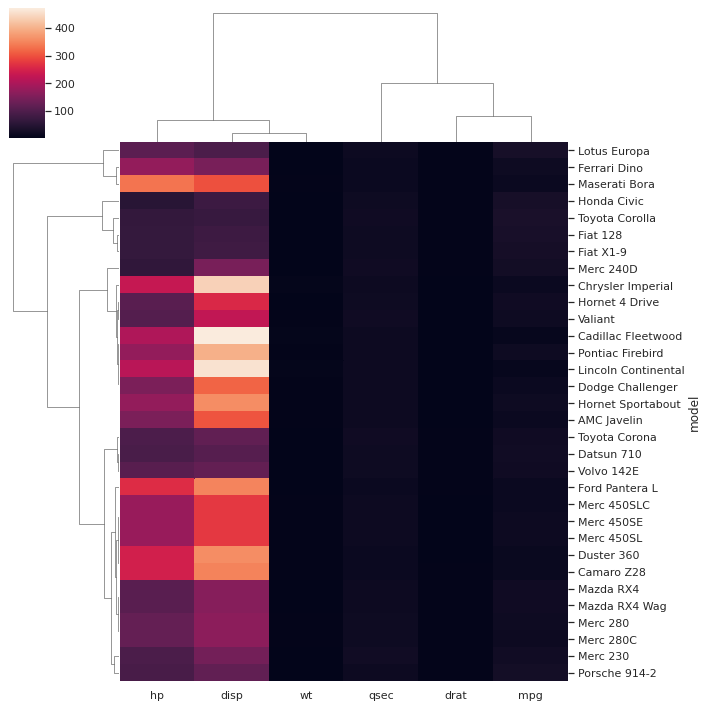

In [ ]:
sns.clustermap(df[['disp', 'drat', 'hp', 'mpg', 'qsec', 'wt']],metric='correlation')

In [ ]:
!pip install d3heatmap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 KB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=c6f25c1dbfc75e037067556eb0f7557af2a399b40113978d2c1ce90d1426dc36
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


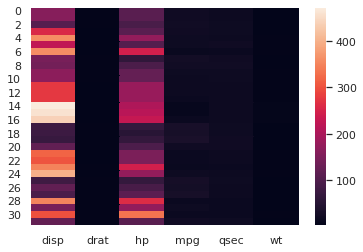

In [ ]:
hm = sns.heatmap(data = df6[['disp', 'drat', 'hp', 'mpg', 'qsec', 'wt']])
  
# displaying the plotted heatmap
plt.show()

PCA -- do

# ONE CATEGORICAL VARIABLE

In [ ]:
df7 = pd.read_csv("7_OneCatOneNum.csv")
df7.head()

,Country,Value
0,United States,12394.0
1,Russia,6148.0
2,Germany (FRG),1653.0
3,France,2162.0
4,United Kingdom,1214.0


<ipython-input-59-753a74ebacbc>:1: UserWarning:

In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.



<StemContainer object of 3 artists>

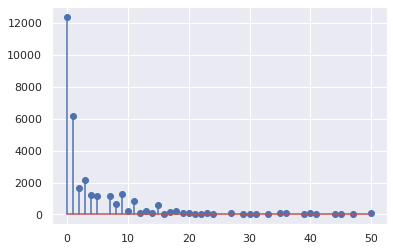

In [ ]:
plt.stem(df7['Value'])

In [ ]:
df_7 = df7.dropna()
df_7.tail()
df_7.shape

(38, 2)

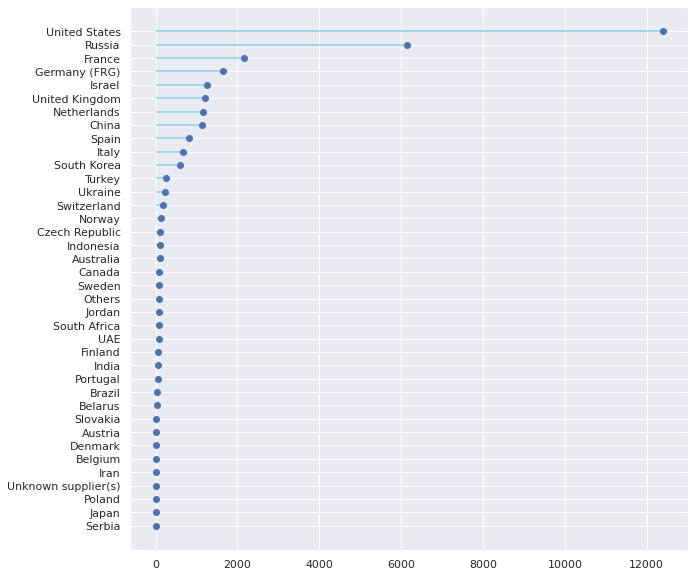

In [ ]:
my_range=range(1,len(df_7.index)+1)
odf_7 = df_7.sort_values(by='Value')

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

plt.hlines(y=my_range, xmin=0, xmax=odf_7['Value'], color='skyblue')
plt.plot(odf_7['Value'], my_range, "o")

plt.yticks(my_range, odf_7['Country'])
plt.show()

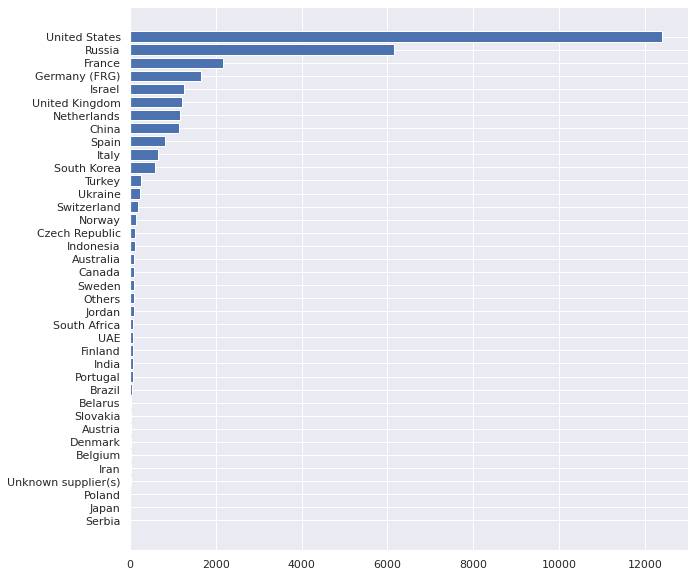

In [ ]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

odf_7 = df_7.sort_values(by='Value')
plt.barh(y=odf_7.Country, width=odf_7.Value);

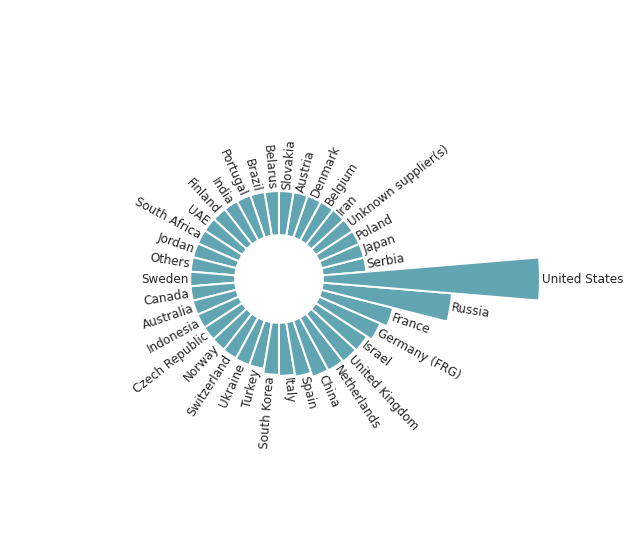

In [ ]:
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

lowerLimit = 2500
labelPadding = 100

max = odf_7['Value'].max()
slope = (max - lowerLimit) / max
heights = slope * odf_7.Value + lowerLimit
width = 2*np.pi / len(odf_7.index)

indexes = list(range(1, len(odf_7.index)+1))
angles = [element * width for element in indexes]
angles

bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)

for bar, angle, height, label in zip(bars,angles, heights, odf_7["Country"]):
    rotation = np.rad2deg(angle)

    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 


In [ ]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


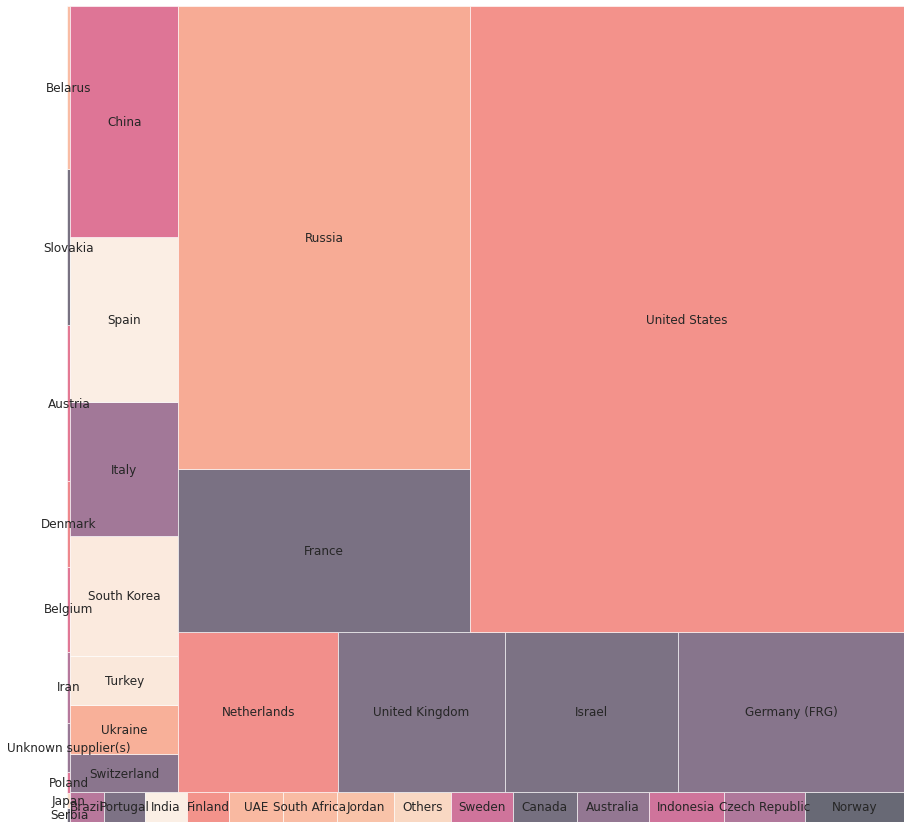

In [ ]:
import squarify
sns.set_style(style="whitegrid") # set seaborn plot style
sizes= odf_7["Value"].values# proportions of the categories
label= odf_7["Country"]
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

squarify.plot(sizes=sizes, label=label, alpha=0.6)
plt.axis('off')
plt.show()

In [ ]:
import plotly.express as px
fig = px.treemap(odf_7, path=['Country'],values='Value', width=800, height=400)
fig.update_layout(
    margin = dict(t=25, l=15, r=15, b=15))
fig.show()

In [ ]:
!pip install circlify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Circle packing

# TWO

# NESTED 

In [ ]:
df9 = pd.read_csv("11_SevCatOneNumNestedOneObsPerGroup.csv")

,"region;""subregion"";""key"";""value"""
0,"Asia;""Southern Asia"";""Afghanistan"";25500100"
1,"Europe;""Northern Europe"";""Åland Islands"";28502"
2,"Europe;""Southern Europe"";""Albania"";2821977"
3,"Africa;""Northern Africa"";""Algeria"";37900000"
4,"Oceania;""Polynesia"";""American Samoa"";55519"


In [ ]:
df9 = df9['region;"subregion";"key";"value"'].str.split(';', expand=True)
df9.head()

,0,1,2,3
0,Asia,"""Southern Asia""","""Afghanistan""",25500100
1,Europe,"""Northern Europe""","""Åland Islands""",28502
2,Europe,"""Southern Europe""","""Albania""",2821977
3,Africa,"""Northern Africa""","""Algeria""",37900000
4,Oceania,"""Polynesia""","""American Samoa""",55519


In [ ]:
df9.columns =["Continent", "Region", "Country", "Pop"]
df9.head()

(250, 4)

In [ ]:
# df9['Pop'].astype(str).astype(int)
df9['Pop'] = df9.Pop.astype(int)

In [ ]:
df9.dtypes

Continent    object
Region       object
Country      object
Pop           int64
dtype: object

In [ ]:
fig = px.treemap(df9, path=["Continent"],values='Pop', width=800, height=400)
fig.update_layout(
    margin = dict(t=25, l=15, r=15, b=15))
fig.show()

In [ ]:
fig = px.treemap(df9, path=["Region"],values='Pop', width=800, height=400)
fig.update_layout(
    margin = dict(t=25, l=15, r=15, b=15))
fig.show()

In [ ]:
fig = px.treemap(df9, path=["Country"],values='Pop', width=800, height=400)
fig.update_traces(root_color="lightgrey")
fig.update_layout(
    margin = dict(t=25, l=15, r=15, b=15))
fig.show()

In [ ]:
fig = px.treemap(df9, path=[px.Constant("world"), 'Continent', 'Country'], values='Pop', 
                 width=800, height=400, color = 'Pop')
fig.update_traces(root_color="lightgrey")
fig.update_layout(
    margin = dict(t=25, l=15, r=15, b=15))
fig.show()


In [ ]:
fig = px.treemap(df9, path=[px.Constant("world"), 'Continent', 'Region'], values='Pop', 
                 width=800, height=400, color='Pop')
fig.update_traces(root_color="lightgrey")
fig.update_layout(
    margin = dict(t=25, l=15, r=15, b=15))
fig.show()

Circle packing -- do

In [ ]:
df9['Pop'] = df9.apply(lambda row: row.Pop/1000000, axis = 1)

In [ ]:
df9.loc[df9["Pop"] == -1, "Pop"] = 1

In [ ]:
odf9 = df9.sort_values(by='Pop')
df_9 = odf9.tail(20)
df_9

,Continent,Region,Country,Pop
222,Asia,"""South-Eastern Asia""","""Thailand""",65.926261
52,Africa,"""Middle Africa""","""Democratic Republic of the Congo""",67.514000
229,Asia,"""Western Asia""","""Turkey""",75.627384
105,Asia,"""Southern Asia""","""Iran""",77.068000
83,Europe,"""Western Europe""","""Germany""",80.523700
66,Africa,"""Northern Africa""","""Egypt""",83.661000
71,Africa,"""Eastern Africa""","""Ethiopia""",86.613986
244,Asia,"""South-Eastern Asia""","""Vietnam""",90.388000
174,Asia,"""South-Eastern Asia""","""Philippines""",98.678000
142,Americas,"""Central America""","""Mexico""",118.395054


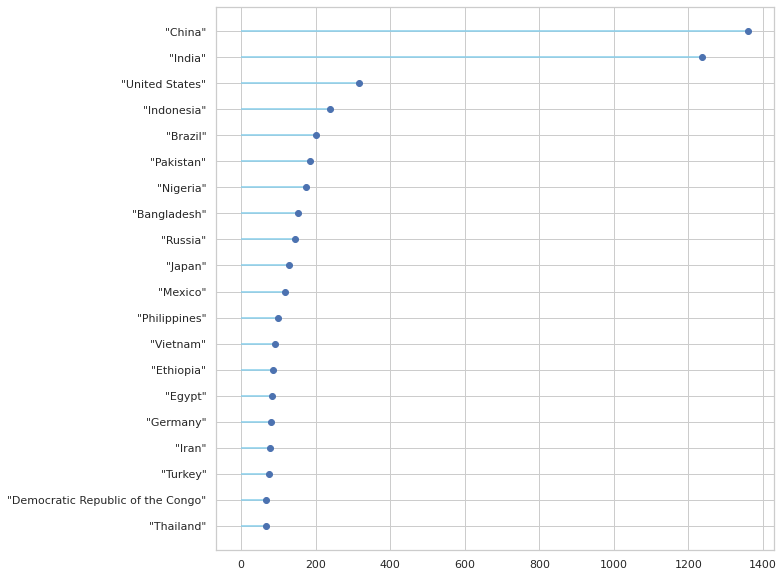

In [ ]:
my_range=range(1,len(df_9.index)+1)

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

plt.hlines(y=my_range, xmin=0, xmax=df_9['Pop'], color='skyblue')
plt.plot(df_9['Pop'], my_range, "o")

plt.yticks(my_range, df_9['Country'])
plt.show()

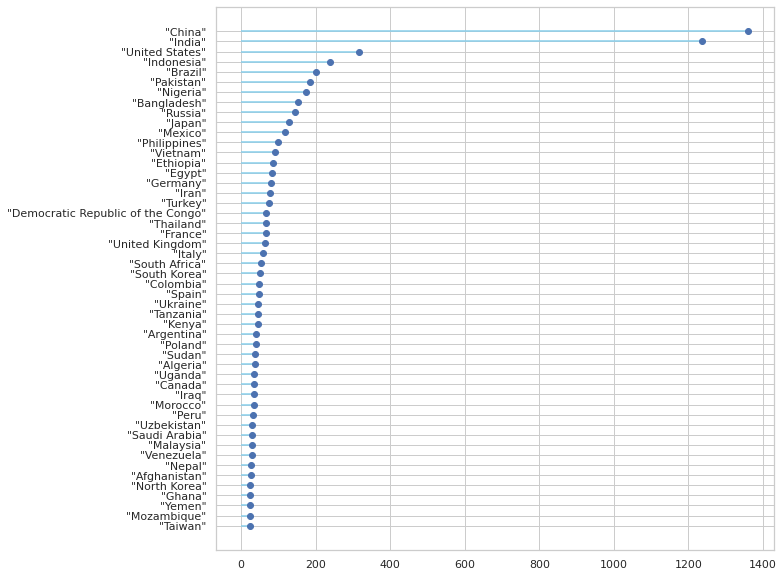

In [ ]:
df = odf9.tail(50)
my_range=range(1,len(df.index)+1)

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

plt.hlines(y=my_range, xmin=0, xmax=df['Pop'], color='skyblue')
plt.plot(df['Pop'], my_range, "o")

plt.yticks(my_range, df['Country'])
plt.show()

circular bar -- do

# SUBGROUP

In [ ]:
df10 = pd.read_csv("https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/9_OneNumSevCatSubgroupOneObs.csv")
df10.head()

,Country,TIME,Value
0,Australia,2000,17.2
1,Australia,2005,15.8
2,Australia,2010,14.0
3,Australia,2015,13.0
4,Austria,2000,23.1


In [ ]:
df_10 = df10.groupby(['Country']).agg({'Value': "count"}) 

# ADJACENCY

In [ ]:
df11 = pd.read_csv("https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/13_AdjacencyDirectedWeighted.csv")
df11.head()

,"Africa ""East Asia"" ""Europe"" ""Latin America"" ""North America"" ""Oceania"" ""South Asia"" ""South East Asia"" ""Soviet Union"" ""West Asia"""
0,Africa 3.142471 0 2.107883 0 0.540887 0.155988...
1,East Asia 0 1.630997 0.601265 0 0.97306 0.3336...
2,Europe 0 0 2.401476 0 0 0 0 0 0 0
3,Latin America 0 0 1.762587 0.879198 3.627847 0...
4,North America 0 0 1.215929 0.276908 0 0 0 0 0 0
